# Import Libraries

In [33]:
import os
import kagglehub as kh
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Download Dataset

In [34]:
path = kh.dataset_download("yasserh/titanic-dataset")

os.listdir(path)

['Titanic-Dataset.csv']

# load data

In [35]:
filepath = '{}/{}'.format(path, os.listdir(path)[0])

df = pd.read_csv(filepath)

# Observe data

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.shape

(891, 12)

In [38]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
#PassengerId: A unique identifier for each passenger (countable whole numbers).

#Survived: 0(549) = Did not survive, 1(342) = Survived (two categories, so it's a binary categorical variable).

#Pclass: Passenger class (3(491), 1(216), 2(184)); ordered but not continuous.

#Name: Passenger names, which are labels without any order. 891 unique names, no duplicates.

#Sex: "male"(577) or "female"(314) (labels without numerical meaning).

#Age: A person’s age can take decimal values (e.g., 22.5 years).(min=0.42, max=80, avg=29)

#SibSp: Number of siblings/spouses aboard (countable whole numbers).

#Parch: Number of parents/children aboard (countable whole numbers).

#Ticket: Ticket numbers or codes, which act as labels.

#Fare: Ticket price, which can have decimal values.

#Cabin: Cabin numbers, which are labels (though some analysis may treat them differently).

#Embarked: Port of embarkation ['S', 'C', 'Q', nan], which are categories.

## Report:
- 12 columns, 891 rows
- Missing data on Age, Cabin, Embarked columns
- Columns: 5 (Object), 5 (int64), 2 (float64) data types
- Data types:
  - PassengerId: numeric (discrete)
  - Survived: categorical(binary)
  - Pclass: categorical(ordinal)
  - Name: categorical(nominal)
  - Sex: categorical(nominal)
  - Age: numeric(continues)
  - Sibsp: numeric(discrete)
  - Parch: numeric(discrete)
  - Ticket: categorical(nominal)
  - Fare: numeric(continues)
  - Cabin: cat(nom)
  - Embarked: cat(nom)


#Handling Missing Values

In [44]:
# Handling Missing Values

# Fill missing values in 'Age' with the median age of passengers
df.loc[:, "Age"] = df["Age"].fillna(df["Age"].median()) ## Median imputation

# Fill missing values in 'Embarked' with the most frequent value (mode)
df.loc[:,"Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0]) # Mode imputation

# Drop the whole 'Cabin' column since it has too many missing values
df.drop("Cabin", axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [46]:
df.shape

(891, 11)

Now we have handled missing values!

#Encoding Categorical Variables

In [48]:
# Encoding Categorical Variables

# OneHotEncoding categorical columns ('Sex' and 'Embarked')
ohe_drop_first = OneHotEncoder(sparse_output=False, drop="first")
ohe = OneHotEncoder(sparse_output=False)

In [49]:
encoded_cols_sex = pd.DataFrame(ohe_drop_first.fit_transform(df[["Sex"]]))
encoded_cols_embarked = pd.DataFrame(ohe.fit_transform(df[["Embarked"]]))

In [50]:
encoded_cols_sex

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0


In [51]:
encoded_cols_embarked

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [56]:
new_embarked_column_labels = ohe.get_feature_names_out(["Embarked"])
new_embarked_column_labels

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [57]:
new_sex_column_labels = ohe_drop_first.get_feature_names_out(["Sex"])
new_sex_column_labels

array(['Sex_male'], dtype=object)

In [58]:
encoded_cols_sex.columns = new_sex_column_labels
encoded_cols_embarked.columns = new_embarked_column_labels

In [59]:
df = pd.concat([df, encoded_cols_sex, encoded_cols_embarked], axis=1).drop(columns=["Embarked", "Sex"])

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0.0,0.0,1.0


# Feature Scaling

In [61]:
# Feature Scaling

scaler= StandardScaler()

In [62]:
numeric_cols = ['Age', 'Fare']

In [63]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,1.0,0.0,0.0,1.0


# Splitting the Dataset

In [80]:
X= df.drop(columns=["Survived", "Name", "Ticket"])
y= df["Survived"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Final Dataset Preview

In [82]:
df.shape

(891, 13)

# Model

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
reg = DecisionTreeRegressor()

In [85]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [86]:
from sklearn.model_selection import cross_val_score

In [88]:
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Cross-validation MSE =',-np.mean(scores))

Cross-validation MSE = 0.2275053304904051


In [93]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier and fit the model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [94]:
# Print the model performance metrics
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-validation accuray =',np.mean(scores))

Cross-validation accuray = 0.8368421052631578


In [95]:
y_pred= clf.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 0.7937219730941704
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       135
           1       0.74      0.73      0.74        88

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



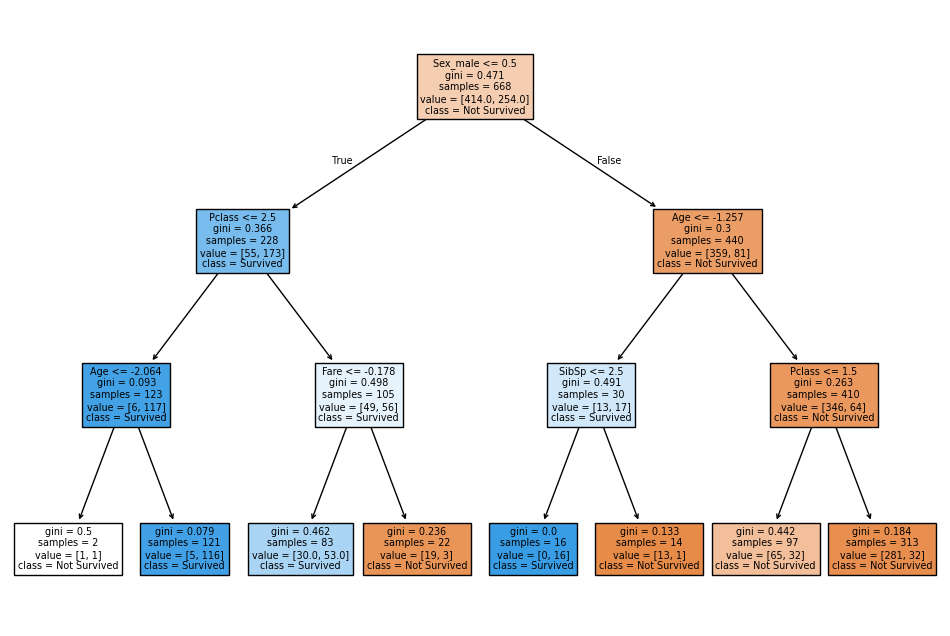

In [97]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Feature Importance

In [98]:
import pandas as pd

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': clf.feature_importances_})
print(feature_importance.sort_values(by="Importance", ascending=False))

       Feature  Importance
6     Sex_male    0.625623
1       Pclass    0.173186
3        SibSp    0.081209
2          Age    0.064660
5         Fare    0.055322
0  PassengerId    0.000000
4        Parch    0.000000
7   Embarked_C    0.000000
8   Embarked_Q    0.000000
9   Embarked_S    0.000000


# Hyperparameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [102]:
X = df.drop(columns=['Ticket','Survived', "PassengerId","Parch" ,"Name", 'Embarked_C', 'Embarked_Q', 'Embarked_S'])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [103]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [105]:
y_pred = grid_search.predict(X_test)

In [106]:

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 0.820627802690583
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       134
           1       0.85      0.67      0.75        89

    accuracy                           0.82       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223

